# Continuous Probabilistic Methods Exercises

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pydataset import data

## 1. Using lemonade.csv dataset and focusing on continuous variables

In [4]:
df = pd.read_csv('lemonade.csv')

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


### > Set the Date columns to be a datatime type and index

In [6]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")

In [7]:
df['month'] = df.index.month_name()

In [21]:
df.shape

(365, 7)

In [8]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


### > Exploring lemonade dataset

- Visualize the continuous variables
- Similar to vizualizing Anscombe's Quartet
We're looking for patterns and a picture is worth 1000 words.
By plotting values, we see more of the picture than .describe can show on its own

Text(0, 0.5, 'Degrees Fahrenheit')

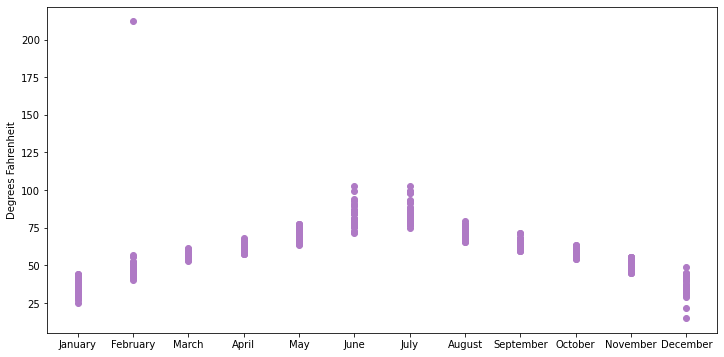

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(df.month, df.Temperature, c=['#AF7AC5'])
plt.ylabel("Degrees Fahrenheit")

In [23]:
df.Temperature.describe()

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: Temperature, dtype: float64

In [24]:
# Let's look at the highest temperature days
df[df.Temperature > 100]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-06-26,Monday,102.6,0.47,60,0.5,42,June
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July


**Note: 2017-02-11 temperature is above 200**

In [25]:
# Let's take a look at the days nearby.
df.loc["2017-02-09":"2017-02-13"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


### > How to handle outlier Feb 11th?
- This outlier is so funky/unreal, it might as well be a null
- If we drop the entire row, then we have an entire row of nulls
- We could replace this day's temperature with the day before, the day after, or average the week.

In [ ]:
# Let's assign the temperature for this day to be the same temperature as yesterday
df.loc[df.Temperature == 212, "Temperature"] = df.loc["2017-02-10"].Temperature

### > 

### a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [ ]:
def get_lower_and_upper_bounds(series, k=1.5):
    

### b. Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

### c. Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

### d. Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

### Use a 2 sigma decision rule to isolate the outliers.



#### - Do these make sense?

#### - Should certain outliers be kept or removed?

## 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv